# Exploratory Data Analysis with Python

## TITANIC Dataset

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Loading the titanoic dataset into the pandas dataframe
df = pd.read_csv("C:/Users/HP/Datasets/Titanic.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
df.shape

(891, 12)

## Missing Values

In [6]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


Here we are going to use seaborn library to visualize the missing values by a "heatmap"

<AxesSubplot:>

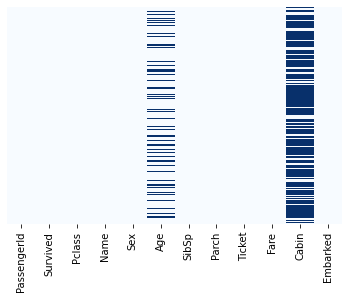

In [7]:
sns.heatmap(df.isnull(),yticklabels= False, cbar= False, cmap ='Blues')

The above blue color lines represents the missing values.

<AxesSubplot:xlabel='Survived', ylabel='count'>

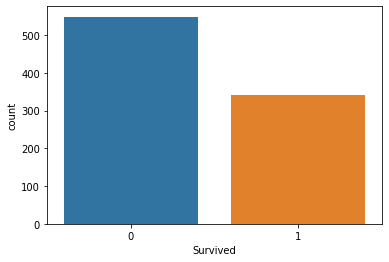

In [8]:
# Making a count plot on Number of persons not survived vs No of Persosn survived
sns.set_style = ("whitegrid")
sns.countplot(x = "Survived" , data =df)

The above information represents the no of persons not survived = "Blue Graph"

No of persons Survived = "Orange graph"

<AxesSubplot:xlabel='Survived', ylabel='count'>

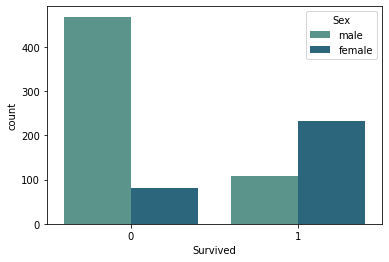

In [10]:
# Here we are going to analyze the no of persons not survived and survived with respect to Gender.
sns.set_style = ('whitegrid')
sns.countplot(x= 'Survived', hue = 'Sex' , data = df, palette = 'crest')

<AxesSubplot:xlabel='Survived', ylabel='count'>

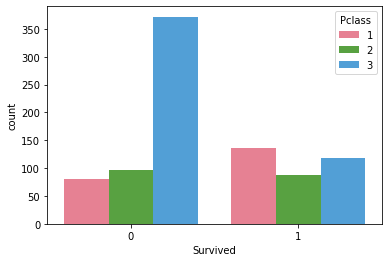

In [11]:
#Plotting a graph on survived feature vs Passenger class feature
sns.set_style = ('whitegrid')
sns.countplot(x = 'Survived', hue = 'Pclass', data = df , palette = 'husl')

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

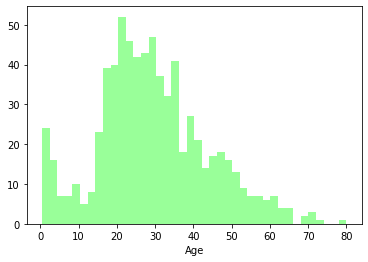

In [12]:
# We are going to find out that which age persons are on the boat Tiatanic using a "Distplot"
sns.distplot(df['Age'].dropna(), kde = False, color ='lime', bins = 40)

<AxesSubplot:xlabel='Age', ylabel='Count'>

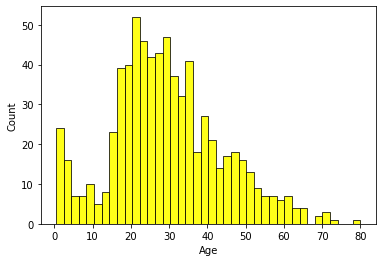

In [13]:
# we can also perform this graph using histogram
sns.histplot(df['Age'].dropna(),color = 'yellow', alpha = 0.9, bins = 40)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

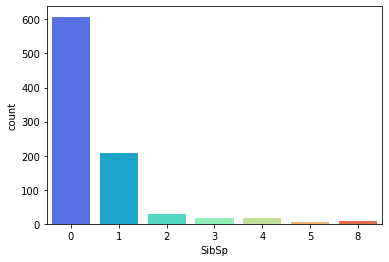

In [14]:
sns.countplot(x = 'SibSp', palette = 'rainbow', data = df)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

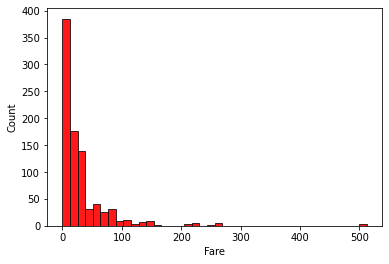

In [15]:
# We are finding the average price of the Ticket
sns.histplot(df['Fare'].dropna(), color = 'red', bins=40, alpha = 0.9)

## Data Cleaning

As in the above we know that in Age column there are many missing values so now we are going to fill the missing values in age column.And so we must take the mean of all the passengers i.e imputation. We can also check the average age by the Passenger class

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

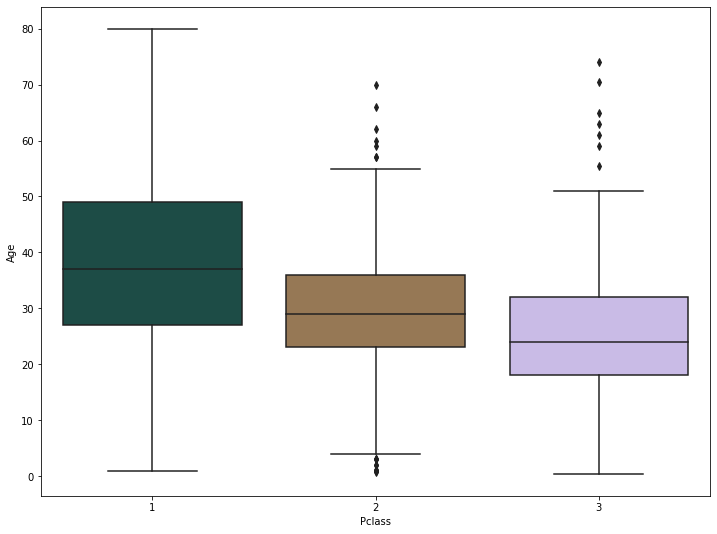

In [16]:
plt.figure(figsize = (12,9))
sns.boxplot(x = 'Pclass', y = 'Age', palette = 'cubehelix', data = df)

By this we can see that many passengers are of old age. And so we will use these average values to Pclass for Age

In [18]:
# Creating a function for filling in the values
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        if Pclass == 2:
             return 19
        else:
            return 24
    else:
        return Age

In [19]:
# Now we are going to apply the above function
df['Age'] = df[['Age', 'Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

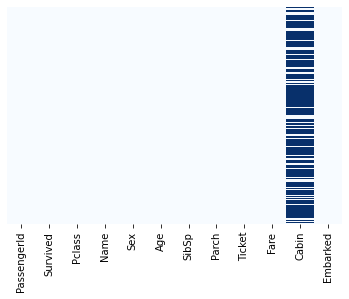

In [20]:
# Rechecking the heat map which have executed above
sns.heatmap(df.isnull(), yticklabels = False, cbar= False, cmap ='Blues')

In [21]:
# Above we can find the age missing values have been replaced
#here we are going to drop the cabin column
df.drop('Cabin',axis=1,inplace = True)

<AxesSubplot:>

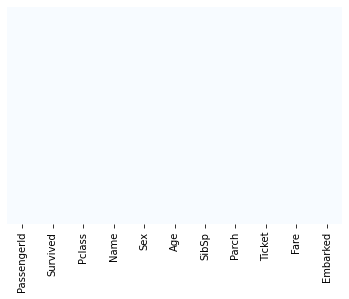

In [22]:
# Again recheck the heatmap
sns.heatmap(df.isnull(), yticklabels = False, cbar= False, cmap ='Blues')

In [23]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## Converting Categorical Features

Here we making duplicate variables of categorical features ans when we are implementing the model such that the ML Algorithm doesnot takes the inputs directly.

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [26]:
sex = pd.get_dummies(df['Sex'],drop_first=True)
embark = pd.get_dummies(df['Embarked'],drop_first=True)

In [27]:
df.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [28]:
df= pd.concat([df,sex,embark],axis=1)

In [29]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


***

### "Here we can also do this Exploratory by single line of Code using AutoViz Library"

We also get different types of graphs using this Autoviz Library

In [30]:

from autoviz.AutoViz_Class import AutoViz_Class

AV = AutoViz_Class()

Imported AutoViz_Class version: 0.0.84. Call using:
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 does not show plot but creates them and saves them in AutoViz_Plots directory in your local machine.


Shape of your Data Set loaded: (891, 12)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  2
    Number of Integer-Categorical Columns =  3
    Number of String-Categorical Columns =  1
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  1
    Number of Numeric-Boolean Columns =  1
    Number of Discrete String Columns =  2
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  2
    Number of Columns to Delete =  0
    12 Predictors classified...
        This does not include the Target column(s)
        4 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 3


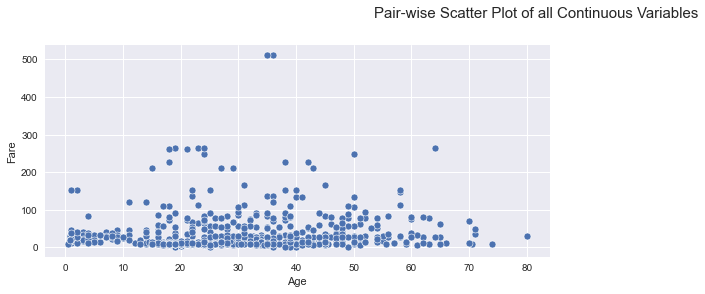

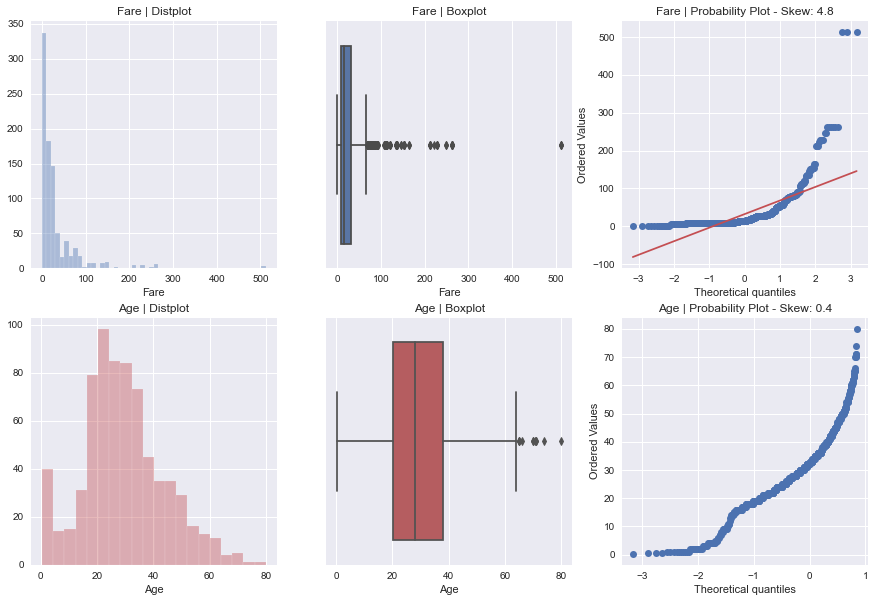

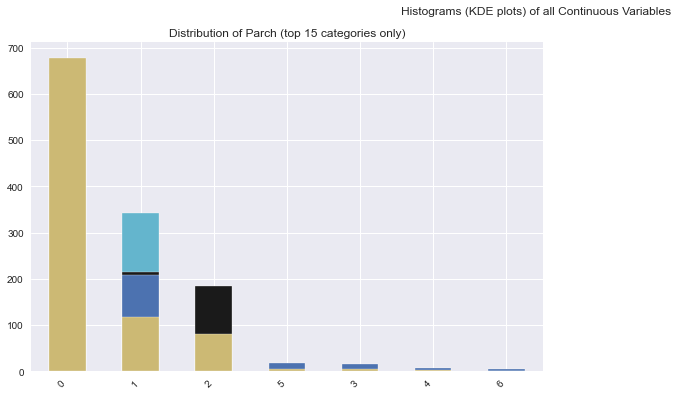

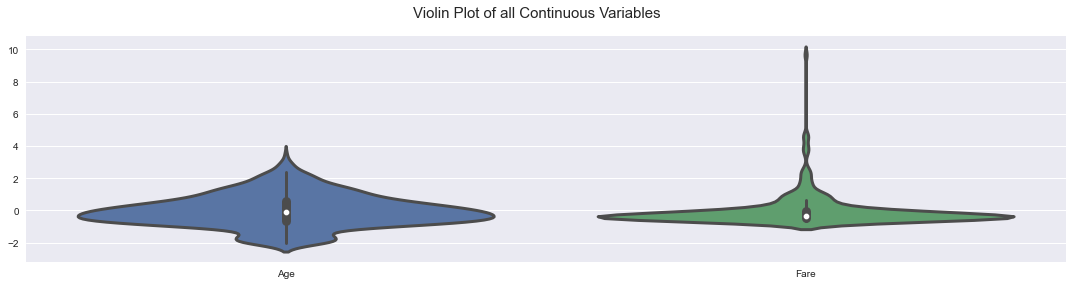

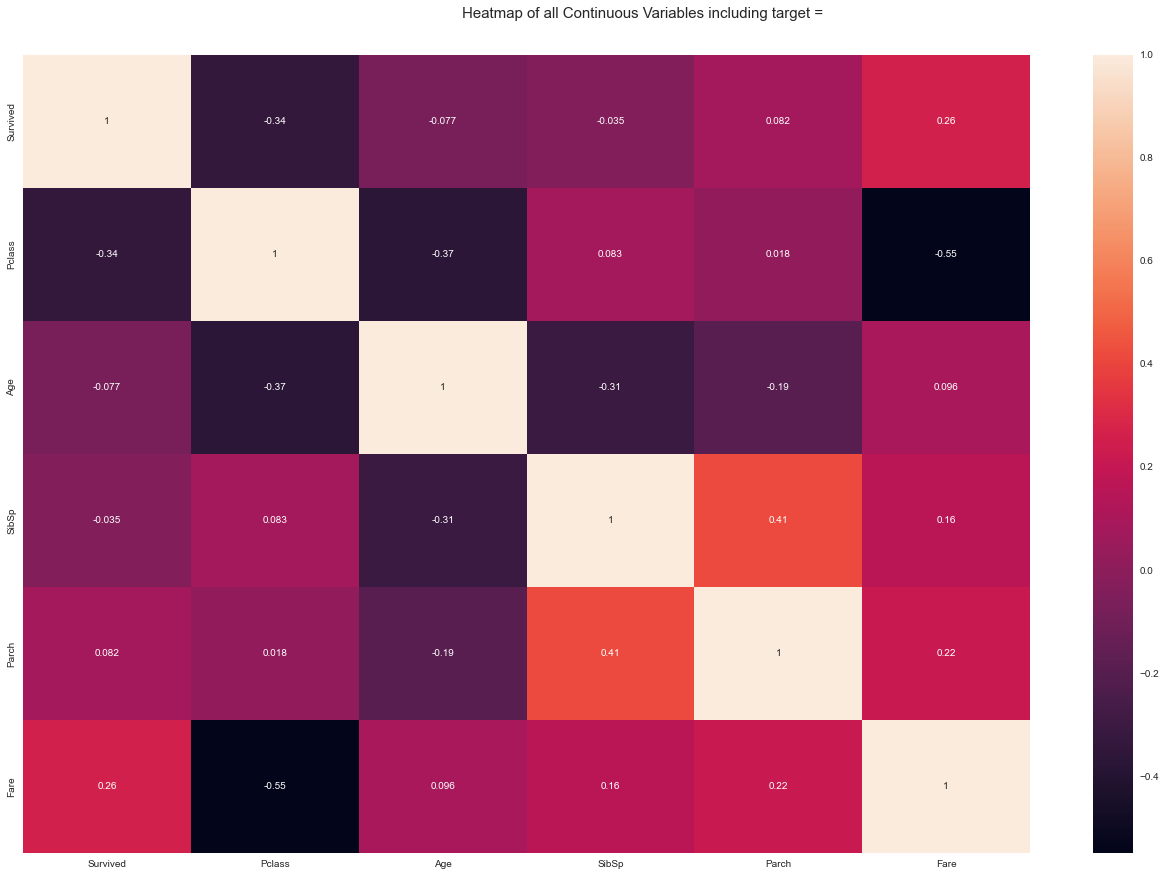

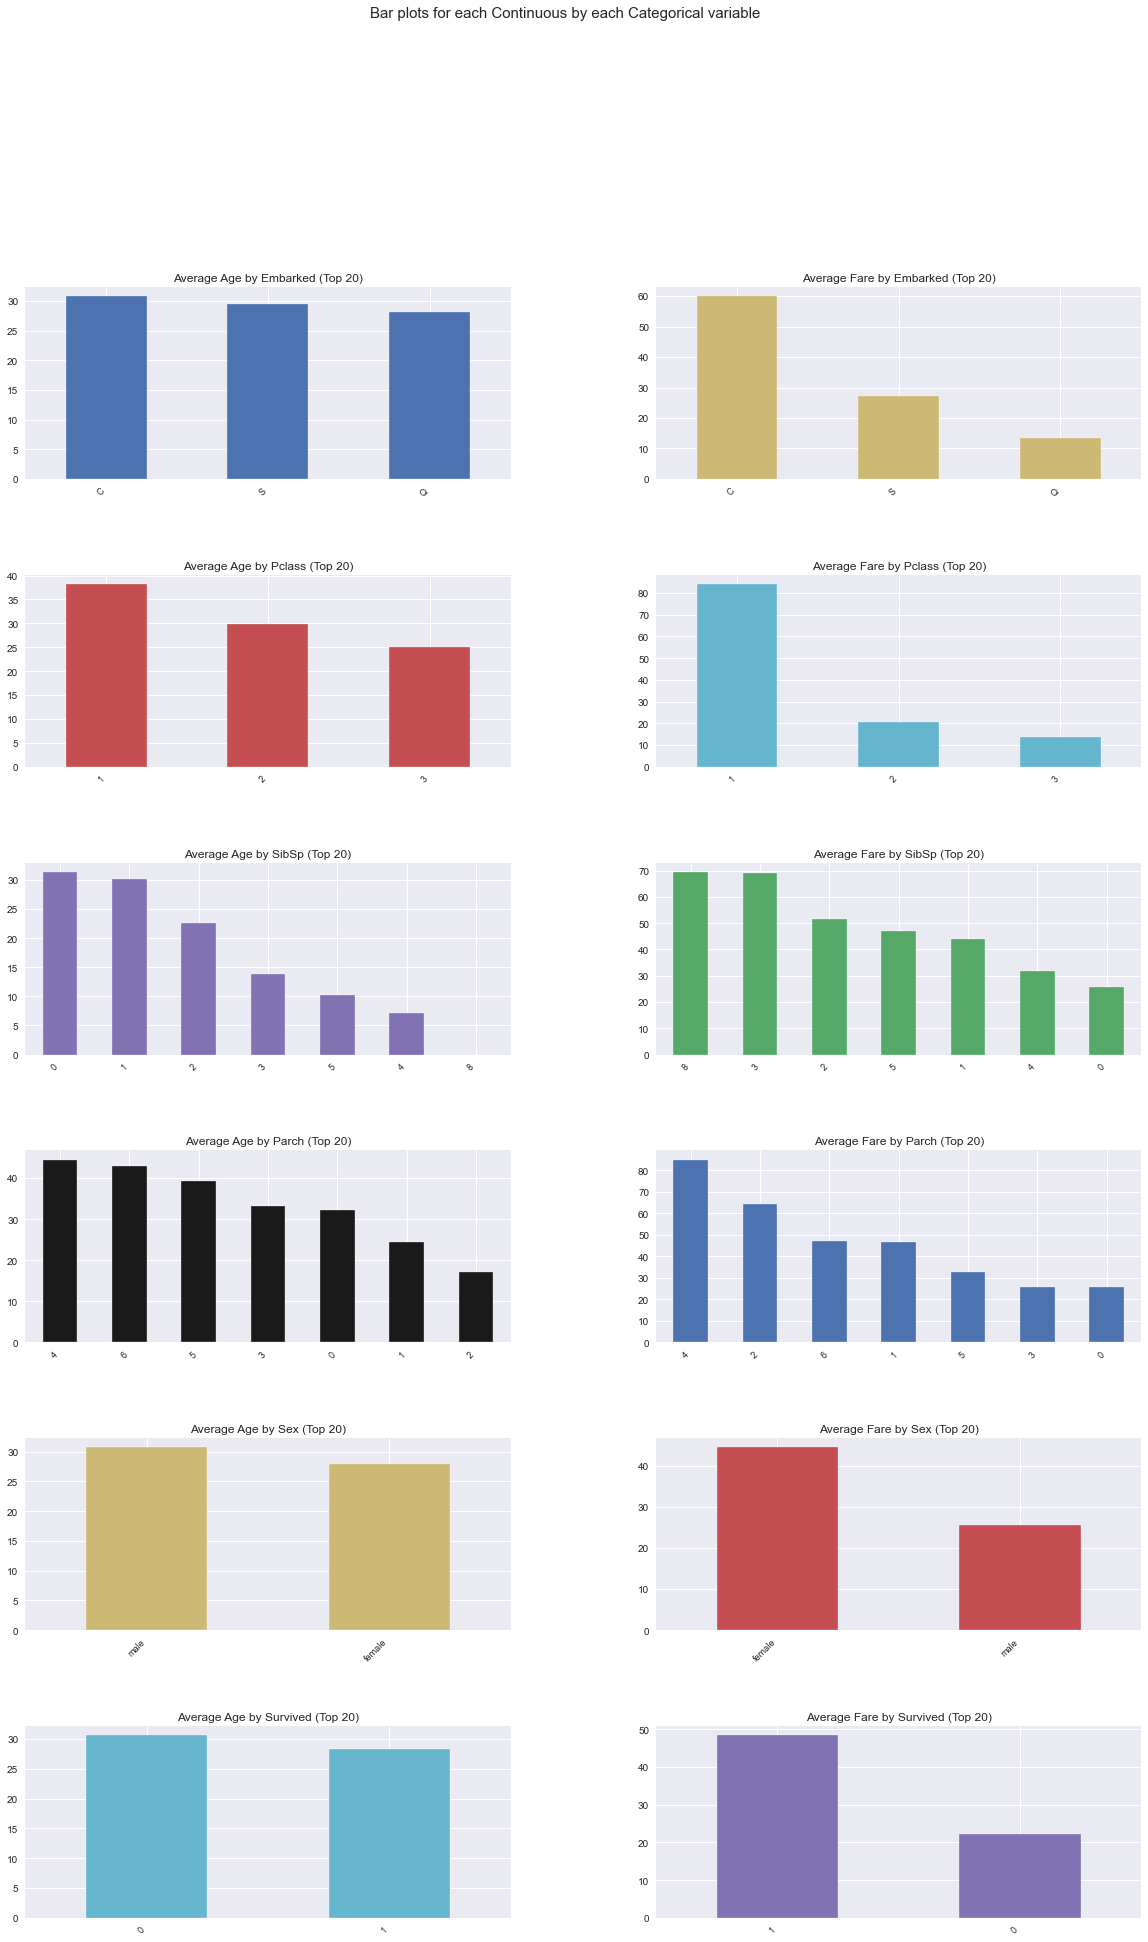

Time to run AutoViz (in seconds) = 6.544

 ###################### VISUALIZATION Completed ########################


In [32]:
filename = "C:/Users/HP/Datasets/Titanic.csv"
sep = ","
dft = AV.AutoViz(
    filename,
    sep=",",
    depVar="",
    dfte=None,
    header=0,
    verbose=0,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=150000,
    max_cols_analyzed=30,
)